In [1]:
import requests
import json
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
import matplotlib
import os
from prettytable import PrettyTable

In [5]:

with open(os.getcwd() + "/../logs/public.log", "r") as fd:
    lines = fd.readlines()
    if lines:
        for i in range(len(lines) - 1, -1, -1):
            stocks = lines[i]
            if stocks != '':
                break
    stocks_start = stocks.find("stock_result")
    stocks_data_mid = stocks[stocks_start:]
    stocks_data = stocks_data_mid[stocks_data_mid.find("[") : stocks_data_mid.find("stock_data") - 2]
    senti_result_start = stocks.find("senti_result")
    senti_result_mid = stocks[senti_result_start:]
    senti_result = senti_result_mid[senti_result_mid.find("["):senti_result_mid.find("\"end_time\":") - 2]

# 绘制输出
df = DataFrame(json.loads(stocks_data))
df['result'] = df['open'].astype('float') > df['close'].astype('float')
Y = "\033[0;33;40m"
N = "\033[0m" # Reset

# 打印情感分析结果
table = PrettyTable(['时间','评论情感', '实际股票结果'])
i = 0
hit_rate = 0
json_data = json.loads(senti_result)
for item in json_data:
    stock_trend = '跌' if df['result'][i] == True else '涨'
    time = df['day'][i]
    if item == 0:
        if stock_trend == '跌' :
            hit_rate = hit_rate + 1
            table.add_row([ Y +time + N, Y + '负面' + N, Y +stock_trend+N])
        else:
            table.add_row([ time, '负面', stock_trend])
    else:
        if stock_trend == '涨' :
            hit_rate = hit_rate + 1
            table.add_row([ Y +time + N, Y + '正面' + N, Y +stock_trend+N])
        else:
            table.add_row([time,'正面', stock_trend])
    i = i + 1

print(table)

+---------------------+----------+--------------+
|         时间        | 评论情感 | 实际股票结果 |
+---------------------+----------+--------------+
| 2022-03-28 10:30:00 |   正面   |      涨      |
| 2022-03-28 11:30:00 |   负面   |      涨      |
| 2022-03-28 14:00:00 |   正面   |      涨      |
| 2022-03-28 15:00:00 |   正面   |      跌      |
| 2022-03-29 10:30:00 |   正面   |      跌      |
| 2022-03-29 11:30:00 |   正面   |      涨      |
| 2022-03-29 14:00:00 |   正面   |      跌      |
| 2022-03-29 15:00:00 |   正面   |      跌      |
| 2022-03-30 10:30:00 |   正面   |      跌      |
| 2022-03-30 11:30:00 |   负面   |      涨      |
| 2022-03-30 14:00:00 |   正面   |      涨      |
| 2022-03-30 15:00:00 |   正面   |      涨      |
| 2022-03-31 10:30:00 |   负面   |      涨      |
| 2022-03-31 11:30:00 |   正面   |      涨      |
| 2022-03-31 14:00:00 |   负面   |      跌      |
| 2022-03-31 15:00:00 |   正面   |      涨      |
| 2022-04-01 10:30:00 |   正面   |      涨      |
| 2022-04-01 11:30:00 |   正面   |      涨      |
| 2022-04-01 14:

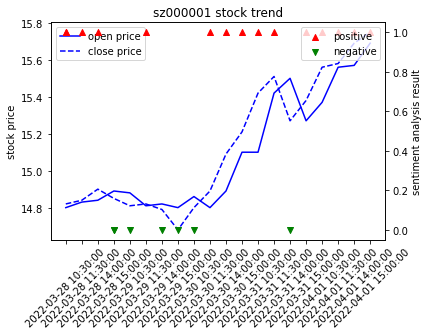

In [6]:

comment_dic = []
for j in range(len(df['result'])):
    item = 0
    if df['result'][j] == False:
        item = 1
    comment_dic.append({'result': item, 'day': df['day'][j]})


fig = plt.figure()
ax = fig.add_subplot(111)
l1, = ax.plot(df['day'], df['open'].astype('float'), label='open price', color='b', linestyle='-')
l2, = ax.plot(df['day'], df['close'].astype('float'), label='close price', color='b', linestyle='--')
plt.legend(handles=[l1, l2], labels=["open price", "close price"], loc='best')
ax2 = ax.twinx()
for j in range(len(comment_dic)):
    label = 'positive'
    color = 'r'
    marker = '^'
    if comment_dic[j]['result'] == 0:
        label = 'negative'
        color = 'g'
        marker = 'v'
    ax2.scatter(comment_dic[j]['day'], comment_dic[j]['result'], marker=marker, color=color)
for j in range(len(comment_dic)):
    if comment_dic[j]['result'] == 1:
        ax2.scatter(comment_dic[j]['day'], comment_dic[j]['result'], label='positive', marker='^', color='r')
        break
for j in range(len(comment_dic)):
    if comment_dic[j]['result'] == 0:
        ax2.scatter(comment_dic[j]['day'], comment_dic[j]['result'], label='negative', marker='v', color='g')
        break
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)
ax2.legend(loc="upper right")
ax.set_ylabel(r"stock price")
ax2.set_ylabel(r"sentiment analysis result")
plt.title("sz000001 stock trend")
plt.show(block=True)